<a href="https://colab.research.google.com/github/IvanLudvig/ComputationalMaths/blob/master/4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

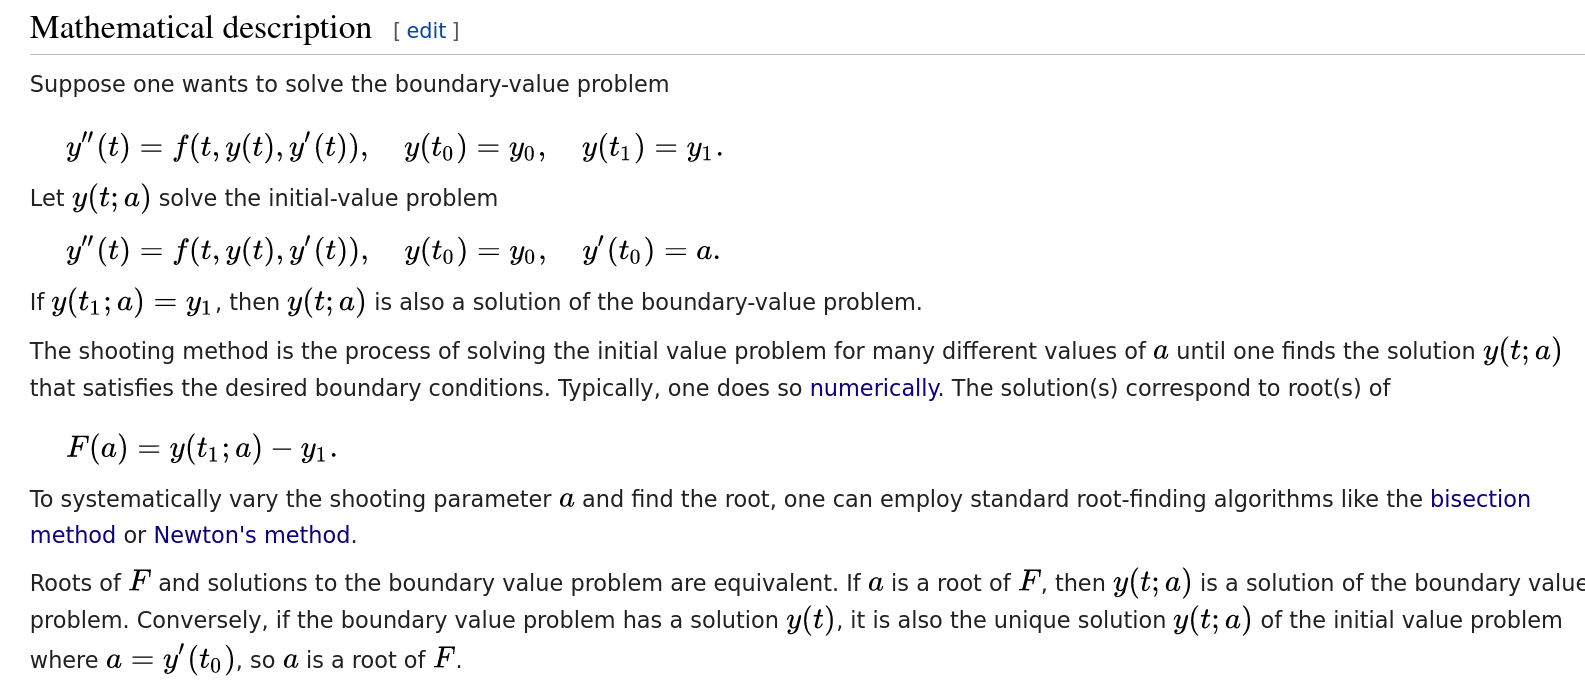

In [1]:
import math
import numpy as np

In [2]:
x0 = math.e
x1 = math.e**2
y0 = math.e
y1 = 2*math.e**2

In [3]:
yn_array = []
target = [3, 4, 5, 6, 7]
y_target = []

f = lambda x, y, dy: math.sqrt( (1/x**2) + (math.e*(y**2)/math.log(x)) - math.exp(dy)*y )
def solveForA(a):
    global yn_array, y_target
    dy0 = a

    N = 10000
    h = (x1 - x0)/N

    def iterate(xn, yn, dyn):
        ynext = yn + h*dyn
        dynext = dyn + h*f(xn, yn, dyn)
        return (ynext, dynext)

    xn = x0
    yn = y0
    dyn = dy0
    yn_array = [yn]
    y_target = []
    while xn<x1:
        yn, dyn = iterate(xn, yn, dyn)
        yn_array.append(yn)
        xn += h
        for t in target:
            if abs(xn-t)<h/2:
                y_target.append(yn)
                break
    return yn

In [4]:
solveForA(1)

14.43858199038913

In [5]:
h = 1e-3

F = lambda a: solveForA(a) - y1
dF = lambda a: (F(a+h)-F(a))/h

In [6]:
an = 1
for i in range(100):
    an = an - (F(an)/dF(an))

an

2.005370766075815

In [7]:
solveForA(an) - y1

-3.552713678800501e-15

In [8]:
yn_array[::1000]

[2.718281828459045,
 3.6905931424210325,
 4.731477615994511,
 5.832255307751159,
 6.98610482909109,
 8.187602055679124,
 9.43233017230292,
 10.716622620509503,
 12.037386728733482,
 13.391978649279885,
 14.778112197861295]

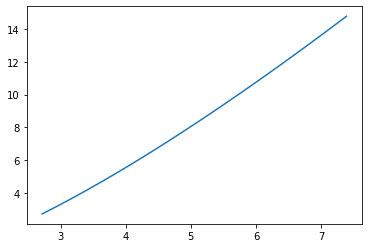

In [9]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.linspace(x0, x1, len(yn_array)), yn_array)

In [10]:
import pandas as pd

pd.DataFrame({'x': target, 'y': y_target}).transpose()

,0,1,2,3,4
x,3.000000,4.000000,5.000000,6.000000,7.000000
y,3.295842,5.545158,8.047154,10.750513,13.621326
